# [NML25] Assignment 3: Node and graph classification

TAs: [Abdellah Rahmani](abdellah.rahmani@epfl.ch)

## Instructions

> ⚠️ **Read carefully before starting**

**Expected output:**

You will have coding and theoretical questions. Coding exercises shall be solved within the specified space:
```python
# Your solution here ###########################################################
...
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
```
Sometimes we provide variable names, such as `x = ...`; do not change names and stick to hinted typing, as they will be reused later.
Within the solution space, you can declare any other variable of function that you might need, but anything outside these lines shall not be changed, or it will invalidate your answers.

Theoretical questions shall be answered in the following markdown cell. The first line will be
```markdown
**Your answer here:**
...
```

**Solutions:**
* Your submission is self-contained in the `.ipynb` file.

* Code has to be clean and readable. Provide meaningful variable names and comment where needed.

* Textual answers in [markdown cells][md_cells] shall be short: one to two
  sentences. Math shall be written in [LaTeX][md_latex].
    **NOTE**: handwritten notes pasted in the notebook are ignored

* You cannot import any other library than we imported, unless explicitly stated.

* Make sure all cells are executed before submitting. I.e., if you open the notebook again it should show numerical results and plots. Cells not run are ignored.

* Execute your notebook from a blank state before submission, to make sure it is reproducible. You can click "Kernel" then "Restart Kernel and Run All Cells" in Jupyter. We might re-run cells to ensure that the code is working and corresponds to the results.

[md_cells]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
[md_latex]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTex-equations

## Objective

The purpose of this assignment is to explore and compare classical graph analysis and learning methods for different tasks on graphs.

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
!pip install grakel
from grakel import GraphKernel
from grakel.utils import graph_from_networkx
seed = 42


Defaulting to user installation because normal site-packages is not writeable


# **Part 1: Graph Classification**

### Dataset
In this part we will work on the MUTAG dataset. The MUTAG dataset is a commonly used benchmark dataset in the field of graph classification and machine learning on graphs. It consists of 188 chemical compounds represented as graphs, where the nodes correspond to atoms and the edges represent chemical bonds between these atoms. Each compound (graph) is labeled with a binary attribute indicating its mutagenic effect on a bacterium, making the dataset suitable for binary classification tasks.

In [ ]:
# Download the dataset
%%capture
!wget https://www.chrsmrrs.com/graphkerneldatasets/MUTAG.zip
!unzip MUTAG.zip

UsageError: Line magic function `%%capture` not found.


### Question 1.1: Graph building and feature extraction

**1.1.1** Build the MUTAG graphs using the downloaded text files. `graphs` is a dictionary with the id's of the graphs as keys (running from 0-187) and the networkX graph objects as values.



In [ ]:
# Build the graphs from edge list

def build_graphs_from_edges(edges_file: str, graph_ids_file: str) -> dict:
# Your solution here ###########################################################

    # Read edges file
    with open(edges_file, 'r') as f_edges:
        edges_list = [tuple(map(int, line.strip().split(','))) for line in f_edges]


    # Read graph IDs file
    with open(graph_ids_file, 'r') as f_ids:
        graph_ids = [int(line.strip()) for line in f_ids]

    # Group edges by graph ID
    graph_edges = {}
    for edge in edges_list:
        graph_id = graph_ids[edge[0]-1]
        if graph_id not in graph_edges:
            graph_edges[graph_id] = []
        graph_edges[graph_id].append(edge)
        graph_edges[graph_id].append(edge[::-1])

    # Create NetworkX graphs
    graphs = {}
    for graph_id, edges in graph_edges.items():
        G = nx.Graph()
        G.add_edges_from(edges)
        graphs[graph_id-1] = G

 # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    return graphs

In [ ]:
# Build the graphs
graphs = build_graphs_from_edges('MUTAG/MUTAG_A.txt', 'MUTAG/MUTAG_graph_indicator.txt')

# Sanity check: check that the edges in the graph match the ones in the text files
print(graphs[1].edges)
print(len(graphs[1].nodes))

[(19, 18), (19, 20), (18, 27), (20, 21), (20, 25), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (26, 28), (28, 29), (28, 30)]
13


In [ ]:
# Extract graph labels
with open('MUTAG/MUTAG_graph_labels.txt', 'r') as f_labels:
      graph_labels = [int(line.strip()) for line in f_labels]

In [ ]:
# Random split to train & test sets
G_train, G_test, y_train, y_test = train_test_split(graphs, graph_labels, test_size=0.3, random_state=seed)

**1.1.2** One possible way to compare molecules is by how complex is their structure. **Suggest** a graph property that you think could be inidicative of molecule complexity. **Motivate** your choice.

**Write** a function to extract the graph property. **Use** the given visualization code to plot the distribution of the property for the two different classes. **Answer:** Is it indicative of mutagenicity?




```markdown
**Your answer here:**
...
```

In [ ]:
def graph_property(G:nx.Graph) -> float:
# Your solution here ###########################################################
  feature = 0
  for source in G.nodes():
      for target in G.nodes():
          if source != target:
              try:
                  # Compute the shortest path length from source to target
                  path_length = nx.shortest_path_length(G, source=source, target=target)
                  feature = max(feature, path_length)
              except nx.NetworkXNoPath:
                  # This exception will be raised if there is no path between source and target
                  continue
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return feature


In [ ]:
G_train_property = np.array([graph_property(G) for G in G_train])

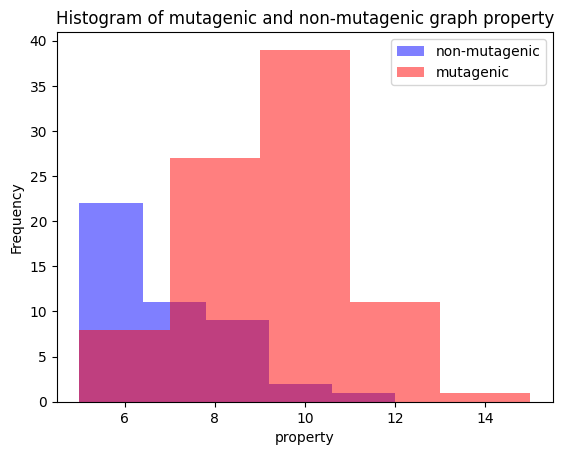

In [ ]:
# Plotting the distribution of the property across mutagenic and non-mutagenic graphs
plt.hist(G_train_property[np.array(y_train)==-1], bins=5, color='blue', alpha=0.5, label='non-mutagenic')
plt.hist(G_train_property[np.array(y_train)==1], bins=5, color='red', alpha=0.5, label='mutagenic')

plt.legend(['non-mutagenic','mutagenic'])

plt.xlabel('property')
plt.ylabel('Frequency')
plt.title('Histogram of mutagenic and non-mutagenic graph property')

plt.show()

**1.1.3** **Suggest** 2 more graph features and compute them for all the graphs in the training set. **Motivate** the choice of features. You may use networkX implementation of the features computations if exist. **Train** a classifier using the `sklearn` library on the suggested features and the feature from the previous question (3 in total). Report the results for the test set. Don't forget to import the chosen classifier from the library.   

```markdown
**Your answer here:**
...
```

In [ ]:
# Your solution here ###########################################################
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

avg_d_train = np.expand_dims(np.array([sum(dict(G.degree()).values()) / float(G.number_of_nodes()) for G in G_train]), 1)
avg_d_test = np.expand_dims(np.array([sum(dict(G.degree()).values()) / float(G.number_of_nodes()) for G in G_test]), 1)
global_c_train = np.expand_dims(np.array([nx.transitivity(G) for G in G_train]), 1) # global clustering coeff (as explained in class)
global_c_test = np.expand_dims(np.array([nx.transitivity(G) for G in G_test]), 1) # global clustering coeff (as explained in class)

G_test_property = np.expand_dims(np.array([graph_property(G) for G in G_test]), 1)

F_train = np.concatenate([np.expand_dims(G_train_property, 1), avg_d_train, global_c_train], axis=1)
F_test = np.concatenate([G_test_property, avg_d_test, global_c_test], axis=1)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=seed))
])

pipeline.fit(F_train, y_train)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

y_pred = pipeline.predict(F_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with handcrafted graph features: {accuracy:.4f}")

Classification accuracy with handcrafted graph features: 0.9474


### Question 1.2: Graph kernels

### Graphlet Kernels

**1.2.1** Read the following passage. It's from a study that investigated the MUTAG molecules and properties related to mutagenicity.
Given the results of the handcrafted features graph representation from the previous question, **suggest** what type of information that is important for the task at hand is not captured. **Answer:** would a kernel based method help in that case? **Explain**.


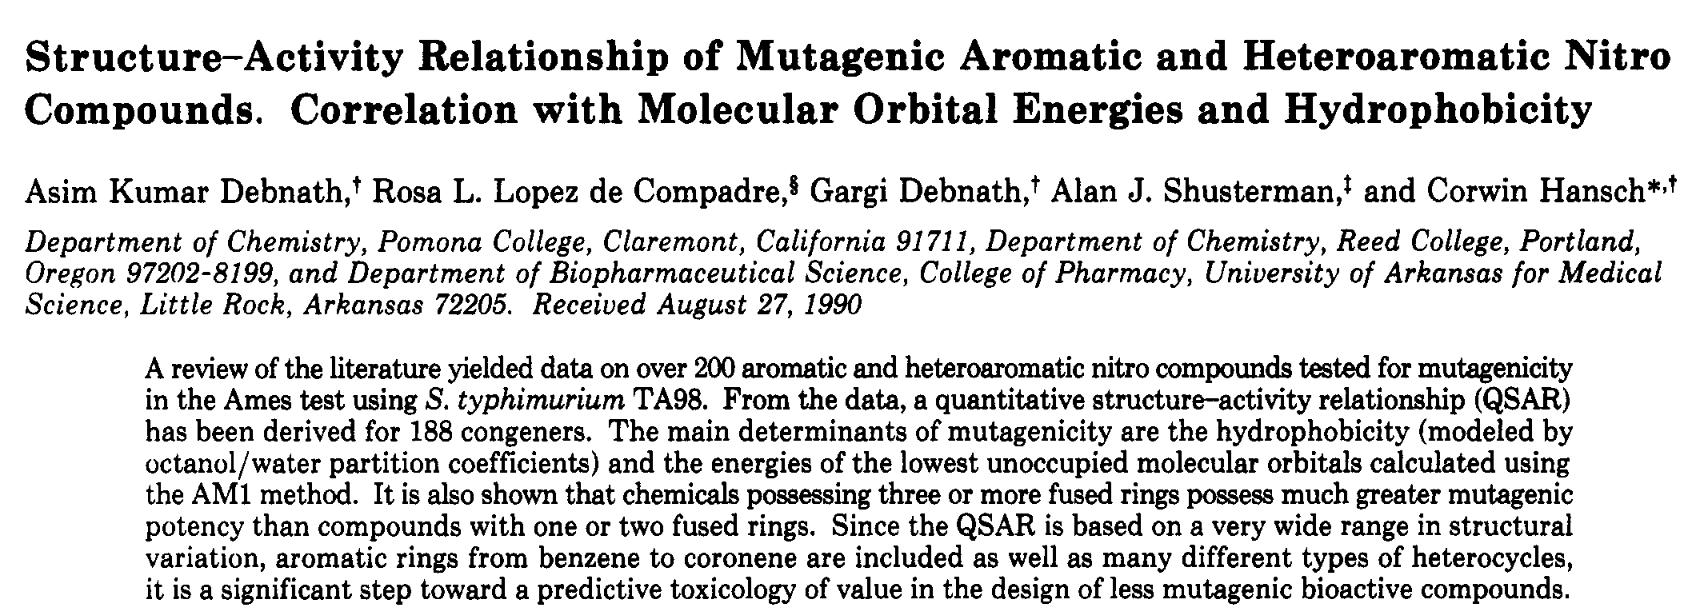


```markdown
**Your answer here:**
It seems that one subgraph structure that could be indicative of mutagenicity is rings. This is not explictly captured by the handcrafted features. Kernels that compare structural properties like the graphlets might be able to capture that.
...
```

**1.2.2** Given the mutagenicity-relevant structures mentioned in the passage in q.1.1.2 is the relevant graphlet kernel computationally tractable? Explain by computing the complexity.*Hint: You can find some intuition in the following paper (section 3.1): https://proceedings.mlr.press/v5/shervashidze09a/shervashidze09a.pdf*
```markdown
**Your answer here:**
Structures indicating fused rings might consist of 5-6 nodes. The average number of nodes in the MUTAG graphs is ~18. The complexity would be O(n^k)=18^6=34012224
```

**1.2.3** In the Servashidze et. al paper from the previous question they suggest to sample the graphlets (sections 3.1-3.2).

**Answer**

* What is the intuition behind the sampling?
* What would be a proper sample size for $k=3$ sized graphlets? **Estimate and explain**  



```markdown
**Your answer here:**
Number of unique graphkets for k=3 is a=4. We will use the bound from the paper to estimate the sample size.
```

In [ ]:
def sample_size(k: int, N: int, a: int, gamma=0.1, eps=0.1) -> float:
  '''
  k: graphlet size (#nodes)
  N: graph size (#nodes)
  a: number of unique (disconnected & connected) graphlets
  '''
  # Your solution here #########################################################
  n_samples = 2.0*(np.log(2)*a+np.log(1./gamma))/(eps**2)
  # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return n_samples

In [ ]:
k = 3
# Your solution here #########################################################
N = 18
a = 4
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
sampling = sample_size(k, N, a)
print(sampling)

1015.0347630467651


**1.2.4** Define $k=3,5$ graphlet kernel using the `grakel` library (already imported). For $k=5$ use the smallest number of samples from the paper as appears in Table2.   

**Train** a classifier with the calculated kernel. Make sure you import the classifier from `sklearn`.

#### Code for $k=3$:

In [ ]:
# Initialize the Graphlet Sampling kernel
# Note: You can adjust 'k' (size of graphlets) and 'sampling' (number of samples) as needed

k = 3

# Your solution here ###########################################################

n_samples = 1015

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

graphlet_kernel = GraphKernel(kernel={"name": "graphlet_sampling", "k": k, "sampling": {"n_samples": n_samples}}, normalize=True, random_state=seed)

# Convert networkX graphs to grakel
G_train_gk = graph_from_networkx(G_train)
G_test_gk = graph_from_networkx(G_test)


# Your solution here ###########################################################

K_train = graphlet_kernel.fit_transform(G_train_gk)
K_test = graphlet_kernel.transform(G_test_gk)

# Train an SVM classifier on the training set
clf = SVC(kernel='precomputed', random_state=seed)
clf.fit(K_train, y_train)

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


# Predict the labels of the test set
y_pred = clf.predict(K_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with Graphlet Sampling kernel: {accuracy:.4f}")

Classification accuracy with Graphlet Sampling kernel: 0.7544


#### Code for $k=5$:

In [ ]:
k = 3
# Your solution here #########################################################
N = 18
a = 34
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
sampling = sample_size(k, N, a)
print(sampling)

5173.917846406436


In [ ]:
k = 5

# Your solution here ###########################################################

n_samples = 5174

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

graphlet_kernel = GraphKernel(kernel={"name": "graphlet_sampling", "k": k, "sampling": {"n_samples": n_samples}}, normalize=True, random_state=seed)

# Convert networkX graphs to grakel
G_train_gk = graph_from_networkx(G_train)
G_test_gk = graph_from_networkx(G_test)


# Your solution here ###########################################################

K_train = graphlet_kernel.fit_transform(G_train_gk)
K_test = graphlet_kernel.transform(G_test_gk)

# Train an SVM classifier on the training set
clf = SVC(kernel='precomputed', random_state=seed)
clf.fit(K_train, y_train)

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Predict the labels of the test set
y_pred = clf.predict(K_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with Graphlet Sampling kernel: {accuracy:.4f}")

Classification accuracy with Graphlet Sampling kernel: 0.8246


**1.2.5** Which graphlet kernel performed better? **Suggest an explanation**

```markdown
**Your answer here:**

The one with k=5. The second one. By increasing k, the graph kernel captures larger, more complex substructures, creating a richer feature space that better distinguishes subtle variations in graph topology.
```

### Other Kernels

**1.2.6** One of the downsides of the aforementioned implementation of graphlet kernels is that it doesn't take into account node labels. In the MUTAG dataset we have access to those labels. **Suggest** another kernel that can take into account the node labels and is also computationaly efficient. **Motivate** your choice.

```markdown
**Your answer here:**
Weisfeiler Lehman kernel.
```

In [ ]:
# Let's add nodes labels to the G_train and G_test graphs
with open('MUTAG/MUTAG_node_labels.txt', 'r') as f_nodes:
      node_labels = [int(line.strip()) for line in f_nodes]

for G in G_train:
  for n in G.nodes:
    G.nodes[n]['label'] = node_labels[n-1]

for G in G_test:
  for n in G.nodes:
    G.nodes[n]['label'] = node_labels[n-1]

**1.2.7**  **Define** the kernel in the code block below and **train** a classifier using it.

In [ ]:
# Your solution here ###########################################################
# Initialize the kernel

kernel = GraphKernel(kernel=[{"name": "weisfeiler_lehman", "n_iter": 5}, {"name": "subtree_wl"}], normalize=True,random_state=seed)


# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
G_train_gk = graph_from_networkx(G_train, node_labels_tag='label')
G_test_gk = graph_from_networkx(G_test, node_labels_tag='label')


# Your solution here ###########################################################

# Compute the kernel matrix
K_train = kernel.fit_transform(G_train_gk)
K_test = kernel.transform(G_test_gk)

# Train an SVM classifier on the training set
clf = SVC(kernel='precomputed', random_state=seed)
clf.fit(K_train, y_train)

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Predict the labels of the test set
y_pred = clf.predict(K_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with chosen kernel: {accuracy:.4f}")

Classification accuracy with chosen kernel: 0.8246


**1.2.8** Let's investigate the performance of the kernel without the node labels, i.e, its ability to capture structural similarity solely. In order to do that we first assign arbitrary labels (=1) to the nodes.

In the code block **define** again the kernel from the previous question and **train** a classifier.

In the text box **answer**: does the suggested kernel outperform the graphlet kernel? If it does, try to explain. If it doesn't, explain and try to suggest an improvement. You may search in the literature.

In [ ]:
# Let's add arbitrary nodes labels to factor out nodes information
with open('MUTAG/MUTAG_node_labels.txt', 'r') as f_nodes:
      node_labels = [int(line.strip()) for line in f_nodes]

for G in G_train:
  for n in G.nodes:
    G.nodes[n]['label'] = 1

for G in G_test:
  for n in G.nodes:
    G.nodes[n]['label'] = 1

In [ ]:
# Your solution here ###########################################################
# Initialize the kernel

kernel = GraphKernel(kernel=[{"name": "weisfeiler_lehman", "n_iter": 5}, {"name": "subtree_wl"}], normalize=True,random_state=seed)


# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
G_train_gk = graph_from_networkx(G_train, node_labels_tag='label')
G_test_gk = graph_from_networkx(G_test, node_labels_tag='label')


# Your solution here ###########################################################

# Compute the kernel matrix
K_train = kernel.fit_transform(G_train_gk)
K_test = kernel.transform(G_test_gk)

# Train an SVM classifier on the training set
clf = SVC(kernel='precomputed', random_state=seed)
clf.fit(K_train, y_train)

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Predict the labels of the test set
y_pred = clf.predict(K_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with chosen kernel: {accuracy:.4f}")

```markdown
**Your answer here:**
The answer should normally be that it doesn't outperform the graphlet kernels. That it's because the implemented WL kernel is of order 1-WL, which doesn't allow capturing structures like triangles, rings, etc. There are higher order WL kernels (commonly used are 2 and 3) but they become computationally expensive.  
```

**1.2.9** Given the performance of the handcrafted features and the kernels in the MUTAG classification task, **suggest** another kernel that you expect to perform well and **explain** your choice. *Hint: you may go over the list of implemented kernels in the `grakel` library to get some intuition.*

```markdown
**Your answer here:**
Shortest Path kernel.
Weisfeiler-Lehman and graphlet kernels emphasize local patterns, while shortest path kernel may provide additional global information about graph structure.
```

# **Part 2: K-hop Selection**

# Objective:

In this part you will get an intuition about the usefulness of the power of the adjacency matrix and their relation to the receptive field of a graph. This is important for future work on graph representation learning if we deal with large graphs or graphs with distant dependencies among nodes, in which more than one-hop neighborhood needs to be considered.

**2.1** Given a graph G consisting of *n* nodes, write a function that takes as input G, an integer k, and a randomly selected node *i*, and returns the nodes positioned at the k-th hop neighborhood of node *i*. You need to use the powers of the adjacency matrix as part of the solution.

tensor([[0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
         1., 1.],
        [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
         0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
         1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
         1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
         0., 0.],
        [0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 1.],
        [1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
         1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
         0., 0.],
        [1

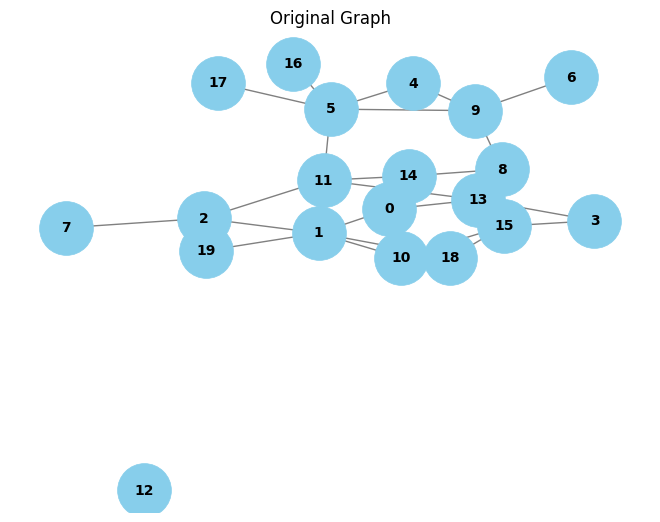

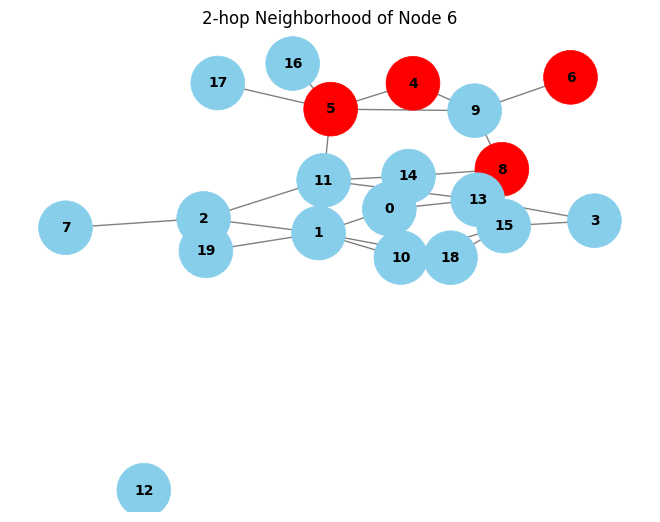

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import torch
def get_layer(adj,layer):
  cloney=torch.from_numpy(adj).clone()
  a1=torch.linalg.matrix_power(cloney, layer)#self.map_toOne(torch.linalg.matrix_power(adj, layer))
  a1[a1!=0] = 1
  a2=torch.linalg.matrix_power(cloney, layer-1)
  a2[a2!=0] = 1
  diff=a1-a2
  print(diff)
  return diff

def k_hop_neighborhood(adj_matrix, node_index, k):
    # Your solution here ###########################################################
    # adj_power = np.linalg.matrix_power(adj_matrix, k)-np.linalg.matrix_power(adj_matrix, k-1)
    np.fill_diagonal(adj_matrix, 1)
    # adj_matrix = make_undirected(adj_matrix)
    adj_power=get_layer(adj_matrix,k)
    # print(adj_power)

    neighbors_at_k_hop = np.nonzero(adj_power[node_index])

    # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    return neighbors_at_k_hop,adj_power

# Generate a random graph using NetworkX
G = nx.fast_gnp_random_graph(20, 0.2)

# Convert the graph to an adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Choose the node index and hop distance

"""
Example- Test with different values of node index and k below.
"""
node_index = 6
k = 2

# print(adj_matrix)

# Find nodes at the k-th hop neighborhood
neighborhood,power = k_hop_neighborhood(adj_matrix, node_index, k)
print(f"Nodes at {k}-th hop neighborhood of node {node_index}: {neighborhood}")

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold', linewidths=0.5, edge_color='gray')
plt.title('Original Graph')
plt.show()

# Highlight the nodes at k-hop neighborhood
nodes_to_highlight = [node_index] + list(neighborhood)
node_colors = ['red' if node in nodes_to_highlight else 'skyblue' for node in range(len(adj_matrix))]
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1500, font_size=10, font_weight='bold', linewidths=0.5, edge_color='gray')
plt.title(f'{k}-hop Neighborhood of Node {node_index}')
plt.show()

**2.2** Given the graph G above, define random node features of any size d (e.g d=32) for each node of the graph. Now extend the function above to select nodes from random hops relative to each node i, and sum the node embeddings to update node i's features. (i.e if the graph has 20 nodes, define 20 random vectors of size d=32. Then given a node A at position i, select nodes from 2 random hops, say 1 and 3. Now sum the random features of these nodes, and sum them again with node A's initial features)

In [ ]:
def k_hop_neighborhood_sampling(adj_matrix, node_index, k:list):
    # Your solution here ###########################################################
    neighbour_features = np.zeros_like(features[node_index])
    for hop in k:
      neighbors_at_k_hop, _ = k_hop_neighborhood(adj_matrix, node_index, hop)
      for neighbour in neighbors_at_k_hop:
        neighbour_features += features[neighbour]
    new_node_features = features[node_index] + neighbour_features
    # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    return new_node_features

# Generate a random graph using NetworkX
G = nx.fast_gnp_random_graph(20, 0.2)

# Generate random node embeddings for each node in the graph

# Your solution here ###########################################################
features = np.random.rand(20, 10)



# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Convert the graph to an adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Choose the node index and hop distance

"""
Example- Test with different values of node index.
"""
node_index = 6
k = [1,3]

print(f"Node {node_index} initial features: {features[node_index]}")
# Update the node features using k-hop neighborhood sampling
new_node_features = k_hop_neighborhood_sampling(adj_matrix, node_index, k)
print(f"Node {node_index} updated features: {new_node_features}")

# **Part 3: Node Classification**

## Objective

The purpose of this assignment is to explore the usefulness of hand-crafted features and learned features with node2vec in a supervised learning setting applied to the tasks of **node-labelling**.

The dataset we will use for this assignment is the Polblogs dataset. The Political Blogs dataset from the “The Political Blogosphere and the 2004 US Election: Divided they Blog” paper. Polblogs is a graph with 1,490 vertices (representing political blogs) and 19,025 edges (links between blogs). The links are automatically extracted from a crawl of the front page of the blog. Each vertex receives a label indicating the political leaning of the blog: liberal or conservative.

In [ ]:
# Download the package we will use

from IPython.display import clear_output
clear_output()

In [ ]:
# Download the node2vec package we will use
# Run this cell to kill the current runtime after downloading 'node2vec', so a package version conflict about 'gensim' when using 'node2vec' can be avoided
# Run all again after commenting out this cell completely
run_cell = False
if run_cell:
  import os
  from IPython.display import clear_output
  !pip install node2vec
  clear_output()
  os.kill(os.getpid(), 9)


In [ ]:
# import useful libraries

from node2vec import Node2Vec
%matplotlib inline
%env PYTHONHASHSEED=0
from IPython.display import clear_output
clear_output()

First of all, we can download the dataset and retrieve the characteristics of the network in the following cells.

In [ ]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

from torch_geometric.datasets import PolBlogs
dataset = PolBlogs(root='./')


2.4.1+cu121


In [ ]:
num_feats=dataset.num_node_features
num_classes=dataset.num_classes

In [ ]:
dataset[0]

Data(edge_index=[2, 19025], y=[1490], num_nodes=1490)

In [ ]:
# Convert PyTorch Geometric graph to NetworkX graph
from torch_geometric.utils.convert import to_networkx
G = to_networkx(dataset[0],node_attrs='y')

In [ ]:
# Print the number of nodes and edges within the dataset
number_of_nodes = G.number_of_nodes()
print('Number of nodes (teams): {}' .format(number_of_nodes))
number_of_edges = G.number_of_edges()
print('Number of edges (egular-season games): {}' .format(number_of_edges))

# Retrieve the labels of nodes in the dataset
values = nx.get_node_attributes(G, "y")
labels = np.unique([values[node] for node in G.nodes()])
print('The node labels are: {}' .format(labels))

Number of nodes (teams): 1490
Number of edges (egular-season games): 19025
The node labels are: [0 1]


In [ ]:
# Load the nodes with each label into a set of node lists
node_list = {}
node_list = [[n for n, v in values.items() if v == l] for l in labels]

# Load the edges between nodes with same/different labels into lists
edge_list_same = [[(s, d) for (s, d) in G.edges() if s in node_list[l] and d in node_list[l]] for l in labels]
edge_list_same_all = []
for l in labels:
  edge_list_same_all += edge_list_same[l]
edge_list_diff = [(s, d) for (s, d) in G.edges() if (s, d) not in edge_list_same_all]

# Show the nodes within each class
print('The labels of each node are:')
for l in labels: print(node_list[l])

The labels of each node are:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 

Now let's visualize dataset, i.e., the graph connectivity of the nodes, and the node labels.

/conda/envs/defog/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


 ...]

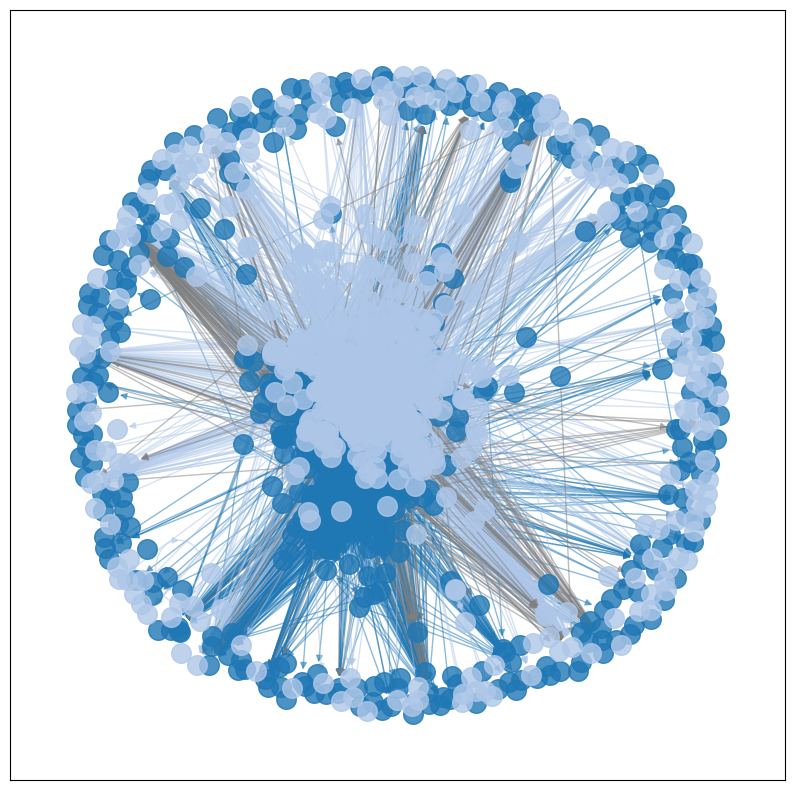

In [ ]:
# Visualize the graph structure; nodes and edges within different classes (labels) are in different colors
cm = plt.cm.tab20
pos = nx.spring_layout(G, seed=0)
plt.figure(figsize=(10,10))

for l in labels:
  nx.draw_networkx_nodes(G, pos, nodelist= node_list[l], node_color=cm(l), node_size=200, alpha=0.8)
  nx.draw_networkx_edges(G, pos, edgelist = edge_list_same[l], width=1.0, alpha=0.5, edge_color=cm(l))
nx.draw_networkx_edges(G, pos, edgelist = edge_list_diff, width=1.0, alpha=0.5, edge_color="tab:gray")

# **Part A: Node Classification [27 pts]**



In this section, you will perform a node-labelling or classification task. You will do this in two different settings:

(a) Using traditional features of degree, eigenvector centrality,
  betweenness centrality,
  closeness centrality, and the
  clustering_coefficients, to train a an SVM classifier

(b)  Using node2vec features to train a an SVM classifier

You can use the sklearn library for this task.


### **3.1 On choice of node features**

(a) Can you think of 5 hand-crafted node features (discussed in the theory lectures) that would be the most helpful to the task of node prediction for this dataset? Please motivate your choice in few sentences.

(b) Between the hand-crafted features and node2vec features, which do you think would be better predictors? Please motivate your answer.


**Your answer here:**

**a)**

- Node degree: number of edges that a node has. We expect teams (nodes) in the same league to have similar node degree
- Eigen-vector node centrality: according to this measure, a node is important if it is surrounded by important neighbors. We expect nodes belonging to the same league to have similar importance, and since the graph above suggest that nodes in the same league are close to each other, it means that each node is mainly surrounded by nodes with similar importance.
- Betweenness node centrality: according to this measure, a node is important if it lies on many shortest paths between other nodes. Exploiting the fact that nodes form the same league are connected to each other, it's likely that they also belong to the same shortest paths, and therefore they should have similar bertweenness centralality.
- Closeness node centrality: according to this measure, A node is important if it has small shortest path lengths to all other nodes. Once again we exploit the fact that nodes belonging to the same league are close to each other, and therefore expected to have similar value for the closeness centrality.
- Clustering coefficient: it measures how tightly clustered a node’s neighborhood is. Therefore, since nodes from the same league are connected to each other, they should have similar clustering coefficient.

**b)**

We think that Node2Vec is going to build better embeddings. This is due to the limitations of the hand-crafted features:
- the features are defined a priori: no adaptation to
the data
-  features exhibit poor generalization performance
across different datasets/graphs
- usually data requires complex and unknown combinations of hand-crafted features, which are difficult to spot.

On the other hand, node2vec is a more flexible, scalable, and is a very effective algorithm for learning node embeddings in graphs.

### **3.2: Data Extraction**


**3.2.1  Node Feature Extraction**
Extract the 5 traditional/hand-crafted features you chose in the earlier question and form a 5-dimensional feature vector for every node in the following cell.

In [ ]:
from networkx.algorithms.bipartite.centrality import betweenness_centrality
def node_feature_extraction(G):
  '''
  INPUT:
  G: the graph

  OUTPUT:
  features: feature matrix of dimensions (N, D) (N: number of samples; D: number of features)
  '''
# Your solution here ###########################################################


  # node degree:
  degree_values = [v for k, v in G.degree]

  #e-vector centrality
  #e_centrality = list(nx.eigenvector_centrality(G).values())
  e_centrality_dict = nx.eigenvector_centrality(G)
  e_centrality = [e_centrality_dict[k] for k in G.nodes]

  # betweenness centrality
  #b_centrality = list(nx.betweenness_centrality(G).values())
  b_centrality_dict = nx.betweenness_centrality(G)
  b_centrality = [b_centrality_dict[k] for k in G.nodes]

  # closeness centrality:
  #c_centrality = list(nx.closeness_centrality(G).values())
  c_centrality_dict = nx.closeness_centrality(G)
  c_centrality = [c_centrality_dict[k] for k in G.nodes]

  # clustering coeff
  #c_coeff = list(nx.clustering(G).values())
  c_coeff_dict = nx.clustering(G)
  c_coeff = [c_coeff_dict[k] for k in G.nodes]


  features = np.stack((degree_values,e_centrality, b_centrality, c_centrality,c_coeff),
                      axis = 1)


#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return features

**3.2.2  Node Target and Label Extraction**
Extract the node targets and all their possible labels in the following cell.

In [ ]:
def node_target_extraction(G):
  '''
  INPUT:
  G: the graph

  OUTPUT:
  targets: target vector of dimensions (N, ) (N: number of samples)
  labels: vector of all possible labels for nodes in the graph
  '''

  targets = [list(a.values())[0] for a in  [b for k,b in G.nodes(data = True)]]
  labels = set(targets)
  return targets, labels

Let's implement and test your feature and target extraction modules in the cell below.

In [ ]:
features_node = node_feature_extraction(G)
targets_node, labels_node = node_target_extraction(G)

### **3.3: Classification Module:**

Design a classifier function by integrating modules including:

1. **Data spliting**: Split dataset into train and test sets (50% - 50%). Make sure the data partition is stratified.

2. **Feature selection**: Implement a feature selection preprocessing step before training to use the k highest scored features for the classification task. You might find `SelectKBest` and `f_classif` in `sklearn.feature_selection` helpful.

3. **Normalization**: Normalize the features after feature selection and before training.

4. **Support-vector based classifier**. You might find `svm.SVC` helpful. Please set `class_weight='balanced'`.

5. **Evaluation**: Implement prediction on the test set. Show the performance using weighted f1 score, and display the confusion matrix. You might find `sklearn.metrics.ConfusionMatrixDisplay` helpful.

*** Please set all `random_state=0` and `seed=0` for reproducibility.**

** This function will be used both for node classification and link prediction in the following parts.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix

def classifier(features, targets, labels, feature_selection=False, num_features=1, test_size=0.5, seed=0, verbose=False):
  '''
  INPUT:
  features: feature matrix of dimensions (N, D) (N: number of samples; D: number of features)
  targets: target vector of dimensions (N, ) (N: number of samples)
  labels: vector of all possible labels for nodes in the graph
  feature_selection: a flag for whether to use feature selction, bool
  num_features: number of features used from feature selesction
  test_size: please set to 0.5 for reproducibility
  seed: please set to 0 for reproducibility
  verbose: print and plot result or not, bool

  OUTPUT:
  cm: confusion matrix on the test set
  f1: weighted f1 score on the test set

  ** Please set all of the random_state=seed in following module **
  '''

  # Split the data into training and testing sets, with test_size=0.5
  # Your solution here ###########################################################
  X_train, X_test, y_train, y_test = train_test_split(features, targets,
                                                      test_size = test_size,
                                                      random_state = seed,
                                                      stratify = targets)
  #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  scaler = StandardScaler()
  if feature_selection:
    ## Your solution here ###########################################################
    ## Build and train the ML model, including feature selection, normalization and Support Vector Classifier. Select the k highest relevant features for the classification.
    selector = SelectKBest(f_classif, k = num_features)
    selector.fit(X_train, y_train)
    X_train_sel = selector.transform(X_train)
    X_test_sel = selector.transform(X_test)

    scaler.fit(X_train_sel)
    feat_new = scaler.transform(X_train_sel)
    test_feat_new = scaler.transform(X_test_sel)

    model = svm.SVC(kernel='linear', class_weight='balanced', random_state=seed)
    model.fit(feat_new, y_train)

    ## Print the scores for individual features.

    ##^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  else:
    ## Your solution here ###########################################################
    ## Build and train the ML model, including normalization and Support Vector Classifier.
    scaler.fit(X_train)
    feat_new = scaler.transform(X_train)
    test_feat_new = scaler.transform(X_test)

    model = svm.SVC(kernel='linear', class_weight='balanced', random_state = seed)
    model.fit(feat_new, y_train)

    ##^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  # Your solution here ###########################################################
  # Use the model to predict the labels of the test data
  y_pred = model.predict(test_feat_new)


  # Output the confusion matrix and weighted f1 score on the test set. Print the weighted f1 score and plot the confusion matrix if verbose
  cm = confusion_matrix(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average = 'weighted')

  if verbose:
    disp = ConfusionMatrixDisplay(cm)
    print('The weighted f1 score is: {0}'. format(f1))
    disp.plot()
    plt.show()


  #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return cm, f1

### **3.4: Node Classification Using Handcrafted Features:**

**3.4.1  Node Classification without Feature Selection**

Train the classifier without feature selection (using all the 5 features) and show the output.

The weighted f1 score is: 0.6550559328858334


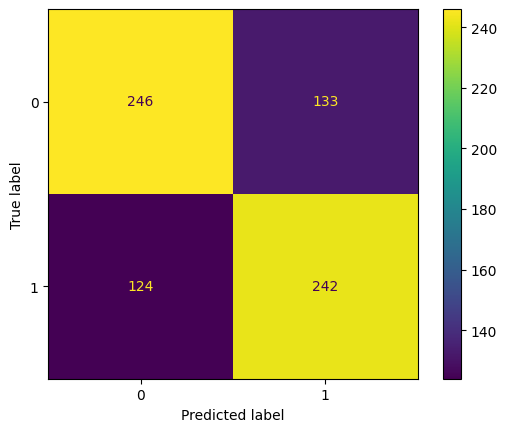

In [ ]:
# Your solution here ###########################################################
cm, f1 = classifier(features_node, targets_node, labels_node, verbose = True)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Then train the classifier with feature selection with top 3 features and show the output including the feature scores.

The weighted f1 score is: 0.6616596371589877


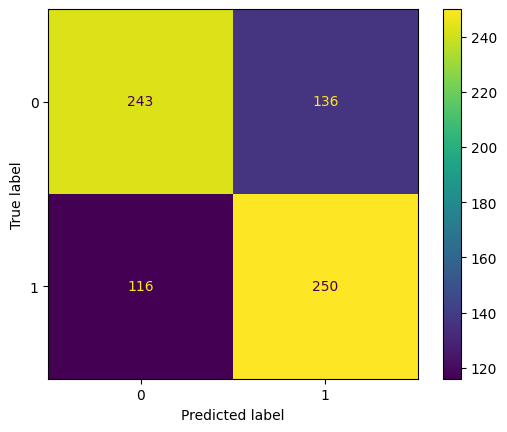

In [ ]:
# Your solution here ###########################################################
cm, f1 = classifier(features_node, targets_node, labels_node,
                    feature_selection=True, num_features=3, verbose = True)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**3.4.2  Find the best number of features selected**
With respect to the weighted f1 score, which is the best number of K chosen for the classification performance on the test set? Show the results using different K into a plot and find the best number of K.

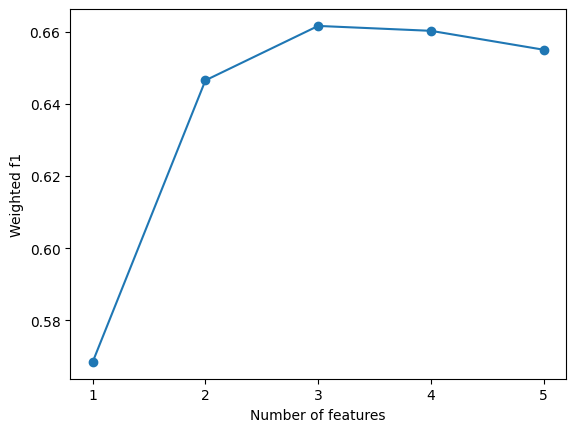

The best K with respect to weighted f1 score is: 3
The f1 score is: 0.6616596371589877


In [ ]:
# Plot the weighted f1 score using different number of best K features in a figure, and print out the best number of K
'''
  k_best: the best number of K with respect to weighted f1 score on the test set
'''
# Your solution here ###########################################################
num_feat = features_node.shape[1]

f1_list = []

for k in range(1, num_feat +1):
  cm, f1 = classifier(features_node, targets_node, labels_node,
                    feature_selection=True, num_features=k, verbose = False)

  f1_list.append(f1)

max_f1 = np.max(f1_list)
k_best = np.argmax(f1_list) + 1

plt.plot([*range(1,6)], f1_list, '-o')
plt.xticks(range(1,6))
plt.xlabel('Number of features')
plt.ylabel('Weighted f1')
plt.show()


#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("The best K with respect to weighted f1 score is: {}".format(k_best))
print("The f1 score is: {}".format(max_f1))

**3.4.3  Explanations for the Best Features**
**Q:** What are the best top K features selected in your implementation? Could you please give an possible explanation for why they play important roles in our node classification task?

**Your answer here:**

The 4 selected fetaures are:
- Node degree
- Eigen-vector node centrality
- Closeness node centrality
- Clustering coefficient

Therefore the only excluded hand-crafted feature is the Betweenness Centrality measure. Compared to what has already been said about the importance of each feature in the model, Betweennes centrality may be less important because while nodes in the same league may be connected to each other and belong to the same shortest paths, this does not necessarily imply that they will have similar betweenness centrality. The betweenness centrality of a node depends on the overall network structure and the specific application or context. Therefore, the relationship between league membership and betweenness centrality should be analyzed on a case-by-case basis.



### **3.5: Node2vec features**

**3.5.1  Node2Vec Basics**

**Q:** Explain the main components of the Node2vec embedding and discuss in short the relevance of the parameters walk length, p, and q, used in the embedding.



**Your answer here:**

Node2vec is a random walk technique used to generate node embeddings by interpolating between BFS and DFS (biased random walk). It is based on two parameters:
- **p**: the *return parameter*, which controls the likelihood of immediately revisiting a node.
- **q**: the *in-out parameter*, which controls the likelihood for the walk to leave the neighborhood of a starting node

We don’t use p and q directly, but 1/p and 1/q.

Another important value characterizing Node2vec, is the **walk length**, which determines the length of the node sequences taken into account. The longer the sequence, the more information is taken into account, but the more the computational cost increases.


**3.5.2 About node2vec parameters**

**Q:** As you know node2vec has two parameters p and q.
Which configuration of these parameters do you think best suits this task?
low/low, low/high, high/low, or high/high?

Please motivate your answer.


**Your answer here:**

**low/high**

Looking at the graph above, we immediately realize that leagues are formed by nodes close to each others, hence we want to sample nodes in a more BFS like manner (idetify nodes from the same community). Therefore we would want to explore nodes not too far away from our starting node. And we would make our parameter **q** large because **1/q** would be a small number, which equals to smaller possibility to move far away from starting node.

As for  **p**, we have a similar but opposite behavior. If *p* is large it is going to do exploration and if *p* is small it is going to stay locally, this is because if *p* is large the random walks will be large as well. Therefore, we want p to be small.




**3.5.3  Node2Vec Node Feature Extraction**

Extract the node2vec features of nodes using the `node2vec.Node2Vec`.

*** Please set `random_state=0` and `seed=0` for reproducibility.**




In [ ]:
def Node2Vec_node_feature_extraction(G, num_features=1, p=1.0, q=1.0, seed=0):
  '''
  INPUT:
  G: the graph
  num_features: dimension of node2vec embeddings, int
  p: float
  q: float
  seed: please always set to 0

  OUTPUT:
  features: feature matrix of dimensions (N, D) (N: number of samples; D: dimension of Node2Vec embeddings)
  '''

  #
  # Your solution here ###########################################################
  from node2vec import Node2Vec

  # Initialize the Node2Vec model
  n2v = Node2Vec(G,dimensions=num_features, p=p, q=q, seed = seed)

  # Train the model to learn node embeddings
  mod = n2v.fit(window=10, min_count=1, batch_words=4)

  embeddings = mod.wv

  features = np.zeros((len(G.nodes()), num_features))
  for i, node in enumerate(G.nodes()):
      features[i, :] = embeddings[node]

  #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return features

**3.5.4  Implement node classification using Node2Vec**

Let's implement your Node2Vec based classification by setting `num_features=3, p=1.0, q=0.1`

/conda/envs/defog/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Computing transition probabilities:   0%|          | 0/1490 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 19.98it/s]


The weighted f1 score is: 0.9154316707697221


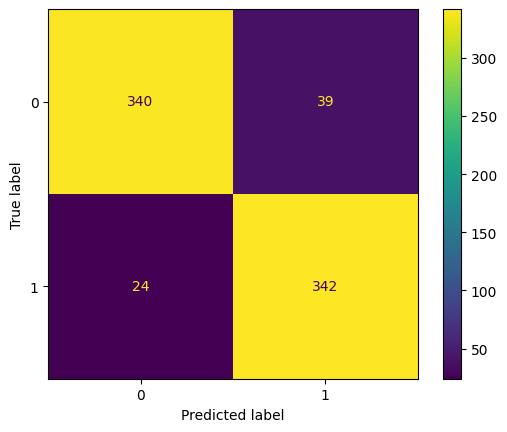

0.9154316707697221

In [ ]:
# Implement Node2Vec by setting:
# num_features=3, p=1.0, q=0.1
# Your solution here ###########################################################

features_n2v = Node2Vec_node_feature_extraction(G,num_features=3, p=1.0, q=0.1)
cm, f1 = classifier(features_n2v, targets_node, labels_node, verbose = True)
f1

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Let's change your parameters to `q=10.0` and implement your results.

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


The weighted f1 score is: 0.8775993444278455


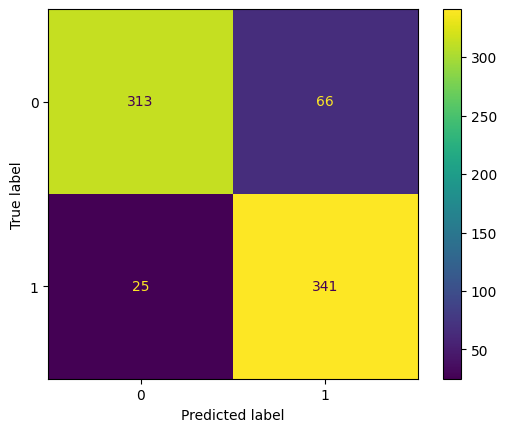

0.8775993444278455

In [ ]:
# Implement Node2Vec by changing:
# q=10.0
# Your solution here ###########################################################

features_n2v = Node2Vec_node_feature_extraction(G,num_features=3, p=1.0, q=10)
cm, f1 = classifier(features_n2v, targets_node, labels_node, verbose = True)
f1

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**3.5.5  Parameters in Node2Vec**

**Q:** What difference do you observe in both classifiers? Why do you think this difference exists by changing this parameter?



**Your answer here:**

As explained in 5.2, a good configuraton under our framework is setting p low and q high. Hence, it was expected to achieve better performance (larger f1 score) by increasing q and leaving p at 1.

**Q:** What might be other parameters that we can change in Node2Vec to improve our classification performance? Try to change this parameter and implement in the cell below to achieve a better performance than above.

**Your answer here:**

There are various parameters that can change the accuracy of the Node2Vec based classifier, such as:
- **Number of Features**: Larger number of features can capture more complex relationships between nodes in the graph. However, higher-dimensional embeddings also require more training data and may be more prone to overfitting.
- **Walk length**: As explained in 5.2, determines the length of the node sequences taken into account. The longer the sequence, the more information is taken into account, but the more the computational cost increases and the more likely overfitting becomes.
- **Window size**: The window size is the number of nodes that are considered "context" for each target node during training. A larger window size can capture more of the local structure in the graph, but may also lead to more noise in the embeddings.
- **Number of walks**: determines how many random walks to perform starting from each node in the graph. By increasing num_walks, it's possible to generate more training samples for the model to learn from, which can potentially improve its accuracy but trades off generalization properties.  
- **Batch size**: The batch_words parameter of Node2Vec controls the number of words (i.e., node sequences) that are processed at once during training. Larger batch sizes can reduce the training time, however, larger batch sizes can lead to overfitting, where the model becomes too specialized to the training data and does not generalize well to new data.

After few trials of grid search, we found the best combination of parameters by changing num_walks=4 and num_features=4, leaving all the other parameters unchanged, reaching in this way an f1 score of roughly 95%.

Generating walks (CPU: 1): 100%|██████████| 4/4 [00:00<00:00, 13.80it/s]


The weighted f1 score is: 0.9126478529389075


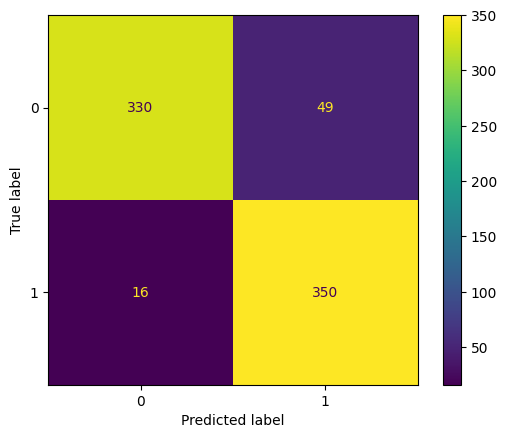

0.9126478529389075

In [ ]:
# Implement Node2Vec by changing your chosen parameter and try to achieve a better performance
# Your solution here ###########################################################


def Node2Vec_node_feature_extraction_new(G, num_features=1, p=1.0, q=10, seed=0):
  '''
  INPUT:
  G: the graph
  num_features: dimension of node2vec embeddings, int
  p: float
  q: float
  seed: please always set to 0

  OUTPUT:
  features: feature matrix of dimensions (N, D) (N: number of samples; D: dimension of Node2Vec embeddings)
  '''

  from node2vec import Node2Vec

  # Initialize the Node2Vec model
  n2v = Node2Vec(G,dimensions=num_features, p=p, q=q, seed = seed
                 , num_walks = 4
                 )

  # Train the model to learn node embeddings
  mod = n2v.fit(window=10, min_count=1, batch_words=4)

  embeddings = mod.wv

  features = np.zeros((len(G.nodes()), num_features))
  for i, node in enumerate(G.nodes()):
      features[i, :] = embeddings[node]

  #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return features

features_n2v_new = Node2Vec_node_feature_extraction_new(G,num_features=4, p=1.0, q=10)
cm, f1 = classifier(features_n2v_new, targets_node, labels_node, verbose = True)
f1

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**3.5.6  Comparing Hand-crafted and Node2Vec Features**

Now we can combine the hand-crafted features and node2vec embeddings together. Use the 5 hand-crafted features and 5-dimensional node embeddings. Construct them into 10-dimensional features and implement them into the classifier with top-3 scored features and show the feature scores in the following cell.

*** Please set `seed=0`, `p=1.0` and `q=10.0` for reproducibility.**

Generating walks (CPU: 1): 100%|██████████| 4/4 [00:00<00:00, 13.74it/s]


The weighted f1 score is: 0.8584213075116944


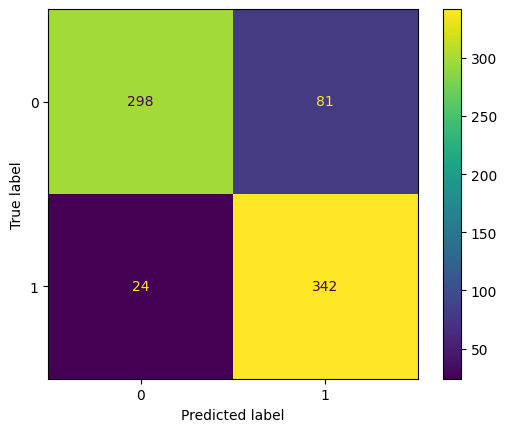

Feature 1: 11.46
Feature 2: 360.91
Feature 3: 1090.23
Feature 4: 893.69
Feature 5: 145.97
Feature 6: 1.19
Feature 7: 63.78
Feature 8: 0.00
Feature 9: 52.62
Feature 10: 2.06


In [ ]:
# Implement Node2Vec and combine them with hand-crafted features then use them for classification
# Your solution here ###########################################################

features_n2v = Node2Vec_node_feature_extraction_new(G,num_features=5, p=1.0, q=10)
features_node = node_feature_extraction(G)

features_final = np.concatenate((features_n2v,features_node), axis = 1)

cm, f1 = classifier(features_final, targets_node, labels_node,
                    feature_selection=True, num_features=3, verbose = True)


# print the scores of the features
selector = SelectKBest(f_classif, k=3)
selector.fit_transform(features_final, targets_node)

scores = selector.scores_
for i in range(len(scores)):
    print("Feature %d: %.2f" % (i+1, scores[i]))
    # note that the first 5 printed features are emb edded with node2vec

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

According the results you showed above, which group of features between hand-crafted and Node2Vec are scored better in general? Could you give an explanation for why this group of features are scored higher than the others and are better predictors in the classifier?

**Your answer here:**

From the result above, the top five scores correspond to the first five printed features, which all belong to Node2Vec group. Therefore, Node2Vec group is scoring far better than the hand-crafted one, meeting the expectations stated in question 1.b. This is due to the limitations of the hand-crafted features:
- the features are defined a priori: no adaptation to
the data
-  features exhibit poor generalization performance
across different datasets/graphs
- usually data requires complex and unknown combinations of hand-crafted features, which are difficult to spot.

# **Part 4: Some theoretical questions**

What are some challenges associated with generating node embeddings in dynamic or evolving graphs?

```markdown
**Your answer here:**

```
Graphs that evolve over time pose significant challenges for node embedding methods originally designed for static networks. These methods must not only capture the current structure of the graph but also account for its historical evolution, a task that is inherently difficult. As the graph structure changes, maintaining consistency in the embedding space becomes problematic, since shifts in the learned representations can adversely affect downstream tasks.

How can node embeddings be leveraged for downstream tasks such as link prediction?

```markdown
**Your answer here:**

```
Node embeddings map each node in a graph to a low-dimensional vector space that captures structural properties. For link prediction, the key idea is to combine the embeddings of two nodes to create a feature vector for the potential edge. This combined representation is then fed into a classifier

What are some common methods for combining two node embeddings into a single link embedding ? How does the choice of combination method impact the performance of a link prediction model ?

```markdown
**Your answer here:**

```
- Concatenation: The embeddings of the two nodes are concatenated into a single, longer vector.
- Element-wise Product: The embeddings are multiplied element by element.
- Absolute Difference (or L1 Difference): The element-wise absolute difference is computed.
- Element-wise Sum: Adding the embeddings together can sometimes serve as a simple way to combine node information.


- Concatenation: By preserving the full information of both nodes, concatenation offers maximum expressiveness. However, the increased dimensionality may require more data to avoid overfitting and may increase computational cost.
- Element-wise Product: This method naturally captures interactions between corresponding dimensions and is symmetric, which is often desirable for undirected graphs. It can be more compact than concatenation, though it might lose some finer details of individual node characteristics.
- Absolute Difference: This approach highlights the differences between nodes, which is beneficial if similar nodes tend to be connected. It provides a balanced view of disparity but may not capture complex interactions as effectively as concatenation. The optimal method depends on the specific properties of the graph, the nature of the links, and the amount of available training data.